In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np
# refer to 《Python 数据科学手册》，p230

#### 1. 使用 plt.axes 手动创建子图

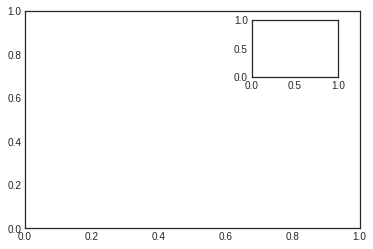

In [2]:
ax1 = plt.axes()  # 默认坐标轴
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])  # 第二个坐标轴，参数为底坐标，左坐标，宽度，高度

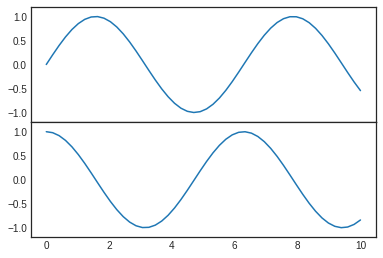

In [3]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4], xticklabels=[], ylim=(-1.2, 1.2))  # 去掉该组图的x轴
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4], ylim=(-1.2, 1.2))
x = np.linspace(0, 10)
ax1.plot(x, np.sin(x))
ax2.plot(x, np.cos(x))

#### 2. 使用 plt.subplot 创建网格
- https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.add_subplot

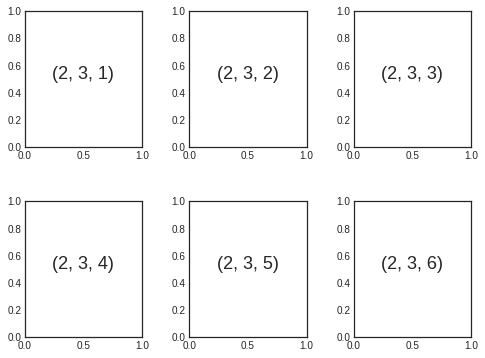

In [4]:
fig = plt.figure(figsize=(8, 6))
fig.subplots_adjust(hspace=0.4, wspace=0.4)  # 设置子图之间的间距
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2,3,i)), fontsize=18, ha='center')

#### 3. plt.subplots, 用一行代码创建网格
这个函数不是用来创建单个子图的，而是用一行代码创建多个子图
- https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots

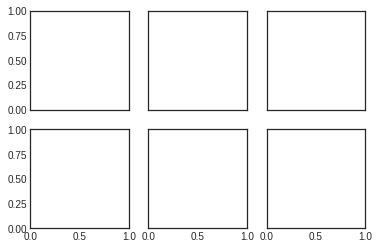

In [5]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

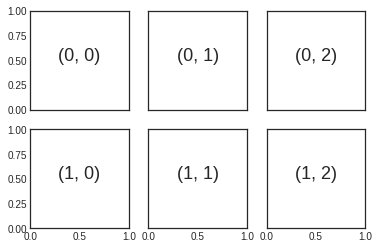

In [6]:
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)), fontsize=18, ha='center')
fig

#### 4. 使用 plt.GridSpec 实现更复杂的排列方式
- 不规则的多行多列子图网格
- https://matplotlib.org/api/_as_gen/matplotlib.gridspec.GridSpec.html#matplotlib.gridspec.GridSpec

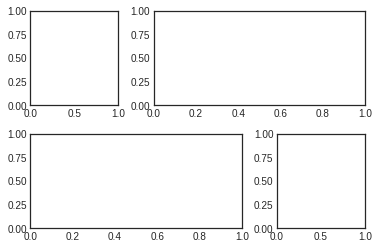

In [7]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])  # 第一行，后面两个 grid 的位置
plt.subplot(grid[1, :2])  # 第二行，前面两个 grid 的位置
plt.subplot(grid[1, 2])

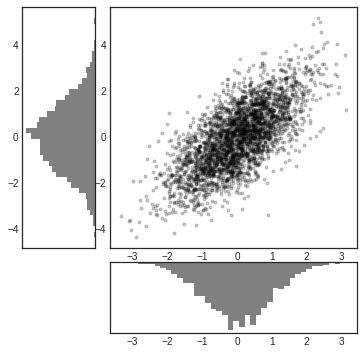

In [8]:
# 多轴频次直方图（multi-axes histogram）
# 创建一些正态分布数据
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x,y = np.random.multivariate_normal(mean, cov, 3000).T

# 设置坐标轴和网格配置方式
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)  # 创建一个 grid
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# 主坐标轴画散点图
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# 次坐标轴画频次直方图
x_hist.hist(x, 40, histtype='stepfilled', orientation='vertical', color='gray')
x_hist.invert_yaxis()  # 沿 y 轴翻转 

y_hist.hist(y, 40, histtype='stepfilled', orientation='horizontal', color='gray')
y_hist.invert_xaxis()  # 沿 x 轴翻转